# Code by : Reham Essam ELDin ElTagoury
# Group: 5

## Practical Work 3

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import genfromtxt
from sklearn.metrics import r2_score

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
X=np.linspace(0, 20)
Y=-2*X+1
type(X)


numpy.ndarray

In [3]:
X.shape

(50,)

#### Plot your data points. 

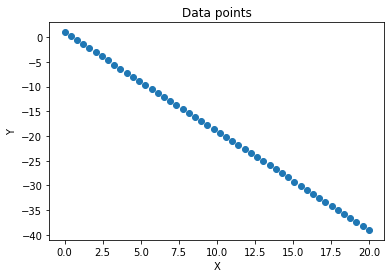

In [4]:
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Data points");

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [6]:
def BatchGD(X,Y,alpha,epochs,eps):
  theta0=theta1=0.0
  m=len(X)
  allpredictions=[]
  thetas0=[]
  thetas1=[]
  losses=np.array([])
  for i in range(epochs):
      # for every epoch cal all the losses and predictions
      y_pred=theta0+theta1*X
      allpredictions.append(y_pred)
      thetas0.append(theta0)
      thetas1.append(theta1)
      losses=np.append(losses,np.sum((y_pred-Y)**2)/(2*m))
      grad0=np.sum((y_pred-Y))/m
      grad1=np.sum((y_pred-Y)@X)/m
      grad=[grad0,grad1]
      theta0=theta0-alpha*grad0
      theta1=theta1-alpha*grad1
      if np.linalg.norm(grad)<=eps:
        return thetas0,thetas1,losses,allpredictions,theta0,theta1
  return thetas0,thetas1,losses,allpredictions,theta0,theta1


In [7]:
thetas0,thetas1,losses,allpredictions,theta0,theta1=BatchGD(X,Y,0.01,3000,1e-3)

In [8]:
r2_score(Y,allpredictions[-1])

0.9999999719862712

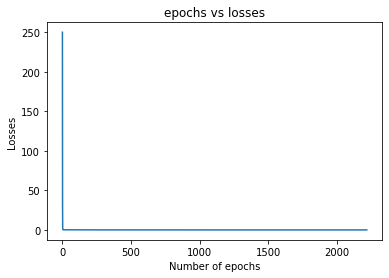

In [9]:
epochs=list(range(len(losses)))
plt.plot(epochs,losses)
plt.xlabel("Number of epochs")
plt.ylabel("Losses")
plt.title('epochs vs losses');
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

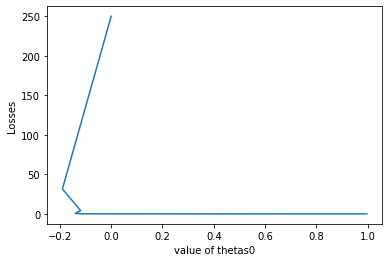

In [10]:
plt.plot(thetas0,losses)
plt.xlabel("value of thetas0")
plt.ylabel("Losses")
plt.show()

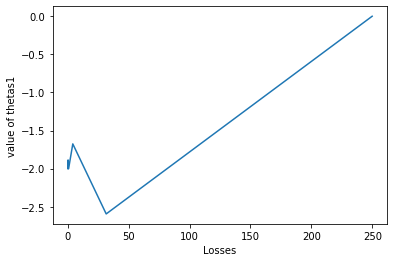

In [11]:
plt.plot(losses,thetas1)
plt.ylabel("value of thetas1")
plt.xlabel("Losses")
plt.show()

#### Plot all regression lines till converge

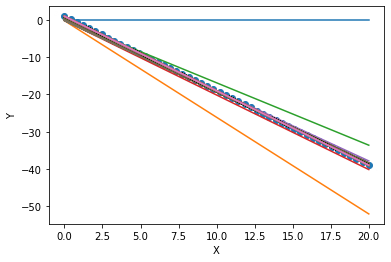

In [12]:
plt.scatter(X,Y)
for i in range(len(allpredictions)):
    plt.plot(X,allpredictions[i])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#### Plot the best regression line

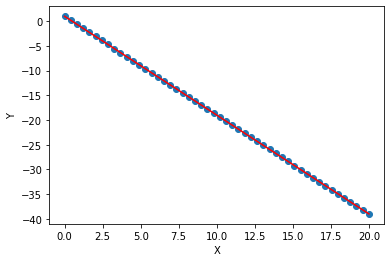

In [13]:
plt.scatter(X,Y)
plt.plot(X,allpredictions[-1],color='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

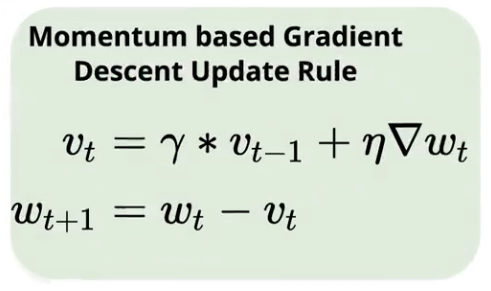

#### γ takes values between 0 and 1.
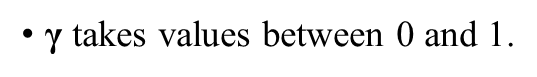

In [32]:
def MomentumGD(X,Y,gamma,eta,epochs,eps):
  theta0=theta1=0.0
  velocity0=velocity1=0.0
  allpredictions=[]
  thetas0=[]
  thetas1=[]
  m=len(X)
  losses=[]
  for i in range(epochs):
      hx=theta0+theta1*X
      losses.append(np.sum((hx-Y)**2)/(2*m))
      thetas0.append(theta0)
      thetas1.append(theta1)
      allpredictions.append(hx)
      grad0=np.sum((hx-Y))/m
      grad1=np.sum((hx-Y)@X)/m
      velocity0=velocity0 * gamma +eta*grad0
      velocity1=velocity1 * gamma +eta*grad1
      if np.linalg.norm([grad0,grad1])<=eps:
         return thetas0,thetas1,losses,allpredictions,theta0,theta1
      theta0=theta0-velocity0
      theta1=theta1-velocity1
  return thetas0,thetas1,losses,allpredictions,theta0,theta1


In [37]:
thetas0,thetas1,losses,allpredictions,theta0,theta1=MomentumGD(X,Y,0.99,0.01,100000,1e-3)

In [38]:
r2_score(Y,allpredictions[-1])

0.9999999999107713

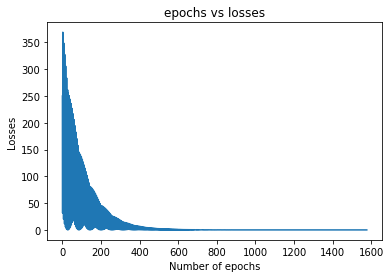

In [39]:
epochs=list(range(len(losses)))
plt.plot(epochs,losses)
plt.xlabel("Number of epochs")
plt.ylabel("Losses")
plt.title('epochs vs losses');
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

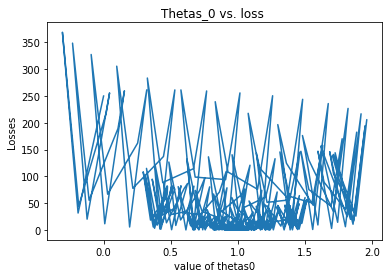

In [41]:
plt.plot(thetas0,losses)
plt.xlabel("value of thetas0")
plt.ylabel("Losses")
plt.title('Thetas_0 vs. loss ');
plt.show()

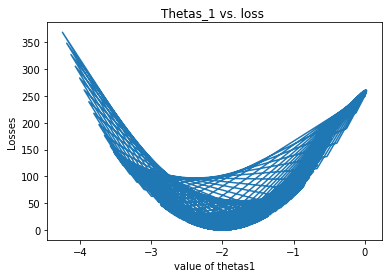

In [42]:
plt.plot(thetas1,losses)
plt.xlabel("value of thetas1")
plt.ylabel("Losses")
plt.title('Thetas_1 vs. loss ');
plt.show()

## Plotting all regression lines

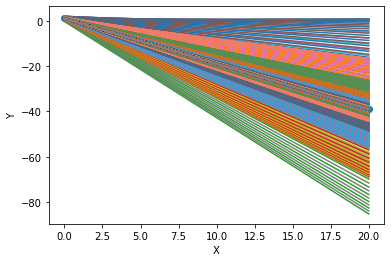

In [43]:
plt.scatter(X,Y)
for i in range(len(allpredictions)):
    plt.plot(X,allpredictions[i])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Plotting the otimal regression line

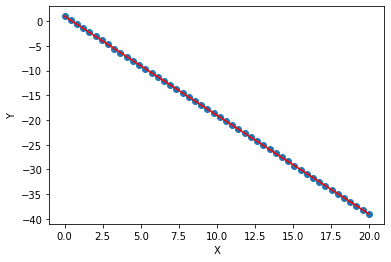

In [44]:
plt.scatter(X,Y)
plt.plot(X,allpredictions[-1],color='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

In [54]:
# very large values
thetas0,thetas1,losses,allpredictions,theta0,theta1=MomentumGD(X,Y,0.99,0.01,100,1e-3)
r2_score(Y,allpredictions[-1])

0.9548075101393158

In [57]:
# very small values
thetas0,thetas1,losses,allpredictions,theta0,theta1=MomentumGD(X,Y,0.01,0.1,100,1e-3)
r2_score(Y,allpredictions[-1])

-9.367758794592022e+217

In [58]:
# 0 momentum
thetas0,thetas1,losses,allpredictions,theta0,theta1=MomentumGD(X,Y,0,0.1,100,1e-3)
r2_score(Y,allpredictions[-1])

-1.1090252987783601e+218

### Update your Batch GD for one variable  implementation to be NAG and check your results

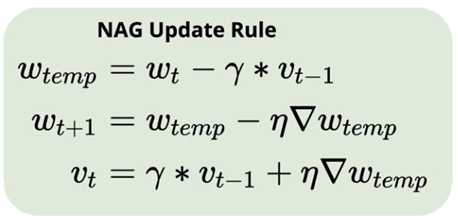

In [108]:
def NAGGD(X,Y,gamma,eta,epochs,eps):
  theta0=theta1=0.0
  w_t0=w_t1=0.0
  theta_temp0=theta_temp1=0.0
  V_t0=V_t1=0.0
  allpredictions=[]
  thetas0=[]
  thetas1=[]
  m=len(X)
  losses=[]
  for i in range(epochs):
      hx=theta0+theta1*X
      losses.append(np.sum((hx-Y)**2)/(2*m))
      thetas0.append(theta0)
      thetas1.append(theta1)
      allpredictions.append(hx)
      # temp thetas
      theta_temp0=theta0-gamma*V_t0
      theta_temp1=theta1-gamma*V_t1
      # grad
      h_temp=theta_temp0+theta_temp1*X
      grad_w_temp0=np.sum(h_temp-Y)/(m)
      grad_w_temp1=np.sum((h_temp-Y)@ X)/(m)
      # velocity update
      V_t0 = (gamma * V_t0 + eta * grad_w_temp0)
      V_t1 = (gamma * V_t1 + eta * grad_w_temp1)
      # new thetas
      theta0=theta_temp0-eta*grad_w_temp0
      theta1=theta_temp1-eta*grad_w_temp1
  return thetas0,thetas1,losses,allpredictions,theta0,theta1


In [113]:
thetas0,thetas1,losses,allpredictions,theta0,theta1=NAGGD(X,Y,0.99,0.001,1000,1e-6)

In [114]:
r2_score(Y,allpredictions[-1])

0.9999999601230823

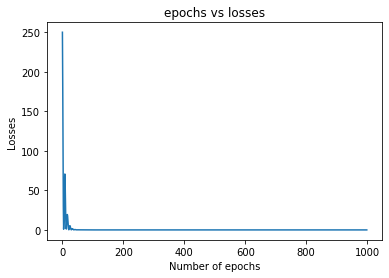

In [115]:
epochs=list(range(len(losses)))
plt.plot(epochs,losses)
plt.xlabel("Number of epochs")
plt.ylabel("Losses")
plt.title('epochs vs losses');
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

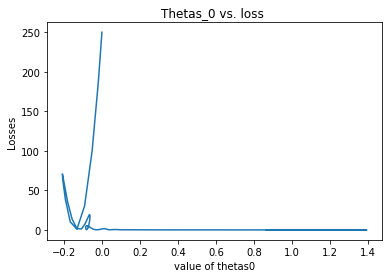

In [116]:
plt.plot(thetas0,losses)
plt.xlabel("value of thetas0")
plt.ylabel("Losses")
plt.title('Thetas_0 vs. loss ');
plt.show()

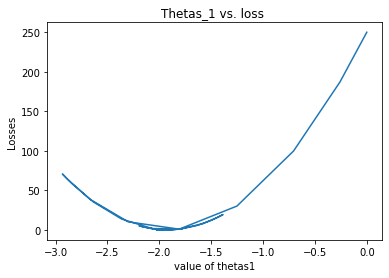

In [117]:
plt.plot(thetas1,losses)
plt.xlabel("value of thetas1")
plt.ylabel("Losses")
plt.title('Thetas_1 vs. loss ');
plt.show()

## Plotting all regression lines

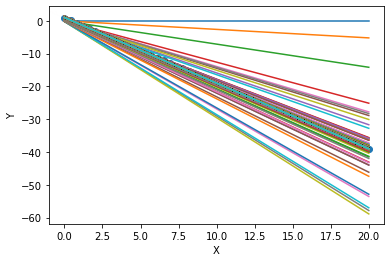

In [118]:
plt.scatter(X,Y)
for i in range(len(allpredictions)):
    plt.plot(X,allpredictions[i])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Plotting the otimal regression line

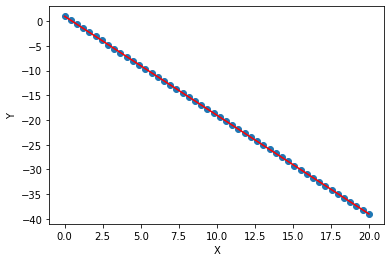

In [119]:
plt.scatter(X,Y)
plt.plot(X,allpredictions[-1],color='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Congratulations 
  ![image.png]( 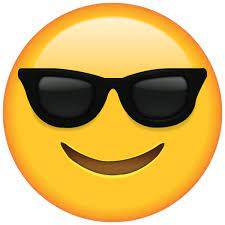)